### 扩展: 多项式回归

In [2]:
x_train = np.array([[6], [8], [10], [14], [18]])
y_train = np.array([[7], [9], [13], [17.5], [18]])

(4.0, 20.0, 4.0, 25.0)

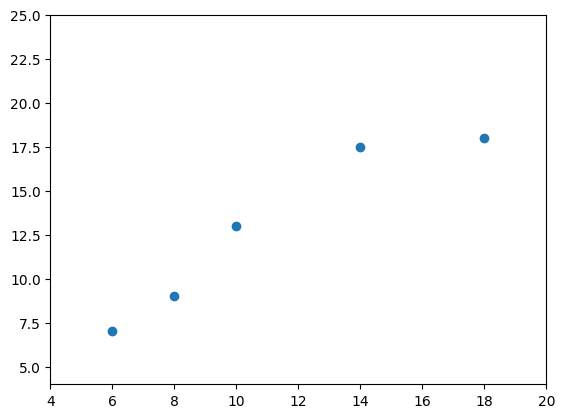

In [4]:
plt.scatter(x_train, y_train)
plt.axis((4, 20, 4, 25))

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

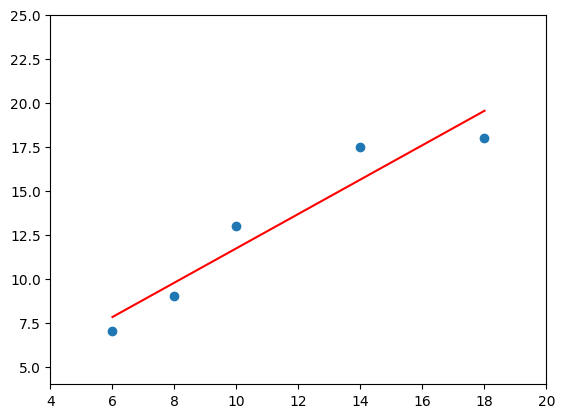

In [7]:
plt.scatter(x_train, y_train)
plt.axis((4, 20, 4, 25))

x_test = np.linspace(6, 18, num=10).reshape(-1, 1)
y_ = linear.predict(x_test)
plt.plot(x_test, y_, c='r')

In [15]:
linear.score(x_train, y_train)

0.9100015964240102

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
n = np.array([[2, 3]])

In [10]:
poly2 = PolynomialFeatures()
poly2.fit_transform(n)

array([[1., 2., 3., 4., 6., 9.]])

In [11]:
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)

In [12]:
x_train_poly2

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  14., 196.],
       [  1.,  18., 324.]])

In [13]:
linear_poly2 = LinearRegression()
linear_poly2.fit(x_train_poly2, y_train)

LinearRegression()

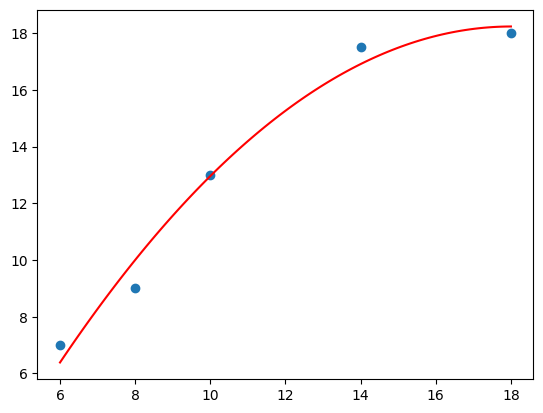

In [14]:
# 预测数据也要做多项式变换
plt.scatter(x_train, y_train)
x_test = np.linspace(6, 18, num=100).reshape(-1, 1)
x_test_poly2 = poly2.transform(x_test)
y_ = linear_poly2.predict(x_test_poly2)
plt.plot(x_test, y_, c='r')

In [17]:
linear_poly2.score(x_train_poly2, y_train)

0.9816421639597427

In [18]:
# 3项式
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)

In [19]:
x_train_poly3

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.400e+01, 1.960e+02, 2.744e+03],
       [1.000e+00, 1.800e+01, 3.240e+02, 5.832e+03]])

In [20]:
linear_poly3 = LinearRegression()
linear_poly3.fit(x_train_poly3, y_train)

LinearRegression()

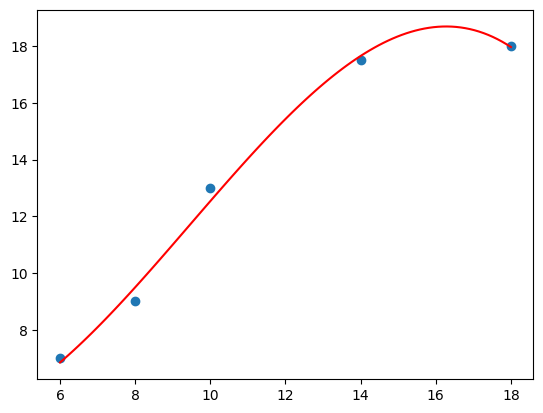

In [21]:
plt.scatter(x_train, y_train)
x_test = np.linspace(6, 18, num=100).reshape(-1, 1)
x_test_poly3 = poly3.transform(x_test)
y_ = linear_poly3.predict(x_test_poly3)
plt.plot(x_test, y_, c='r')

In [22]:
linear_poly3.score(x_train_poly3, y_train)

0.9947351016429964

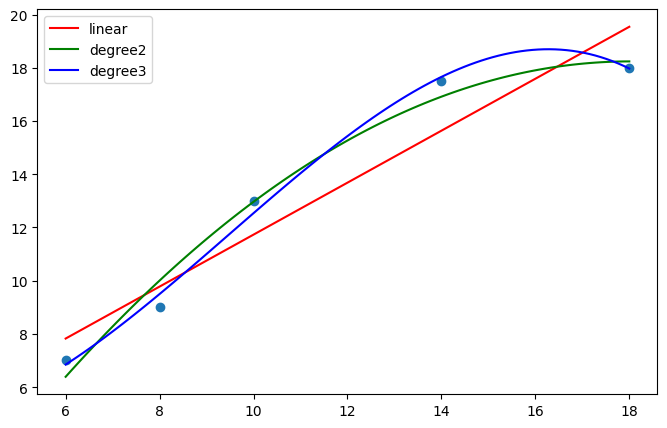

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

x_test = np.linspace(6, 18, num=100).reshape(-1, 1)
y1 = linear.predict(x_test)
plt.plot(x_test, y1, c='r', label='linear')

y2 = linear_poly2.predict(x_test_poly2)
plt.plot(x_test, y2, c='g', label='degree2')

y3 = linear_poly3.predict(x_test_poly3)
plt.plot(x_test, y3, c='b', label='degree3')

plt.legend()

In [24]:
linear_poly2.coef_

array([[ 0.        ,  2.95615672, -0.08202292]])

In [26]:
# 使用多项式提高 台湾房价预测效果
df = pd.read_excel('../data/Real estate valuation data set.xlsx')

In [27]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [72]:
data = df.iloc[:, 1:-1].copy().values
target = df.iloc[:, -1].values.copy()

In [73]:
data

array([[2012.9166667,   32.       ,   84.87882  ,   10.       ,
          24.98298  ,  121.54024  ],
       [2012.9166667,   19.5      ,  306.5947   ,    9.       ,
          24.98034  ,  121.53951  ],
       [2013.5833333,   13.3      ,  561.9845   ,    5.       ,
          24.98746  ,  121.54391  ],
       ...,
       [2013.25     ,   18.8      ,  390.9696   ,    7.       ,
          24.97923  ,  121.53986  ],
       [2013.       ,    8.1      ,  104.8101   ,    5.       ,
          24.96674  ,  121.54067  ],
       [2013.5      ,    6.5      ,   90.45606  ,    9.       ,
          24.97433  ,  121.5431   ]])

In [74]:
target

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2)

In [77]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [78]:
linear.score(X_test, y_test)

0.5155414150550394

In [79]:
# 尝试使用多项式回归提高得分
poly2 = PolynomialFeatures()
X_train_poly2 = poly2.fit_transform(X_train)

In [80]:
X_train.shape

(331, 6)

In [81]:
X_train_poly2.shape

(331, 28)

In [82]:
linear_poly2 = LinearRegression()
linear_poly2.fit(X_train_poly2, y_train)

LinearRegression()

In [83]:
X_test_poly2 = poly2.transform(X_test)
linear_poly2.score(X_test_poly2, y_test)

0.5636509822231259

In [84]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
linear_poly3 = LinearRegression()
linear_poly3.fit(X_train_poly3, y_train)
X_test_poly3 = poly3.transform(X_test)
linear_poly3.score(X_test_poly3, y_test)

# 说明不是项数越高越好. 在我们这个案例中, 二项式是最好的. 

0.18883599138916374

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()

In [86]:
-7000 + 2800 + 2900 + 2850 + 2900 -5050 -7000 - 7000 + 2900 -6000

-17700